In [275]:
import numpy as np
import pandas as pd

In [276]:
url = "diabetes.csv"
data = pd.read_csv(url)

In [277]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [295]:
coor_matrix = data.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


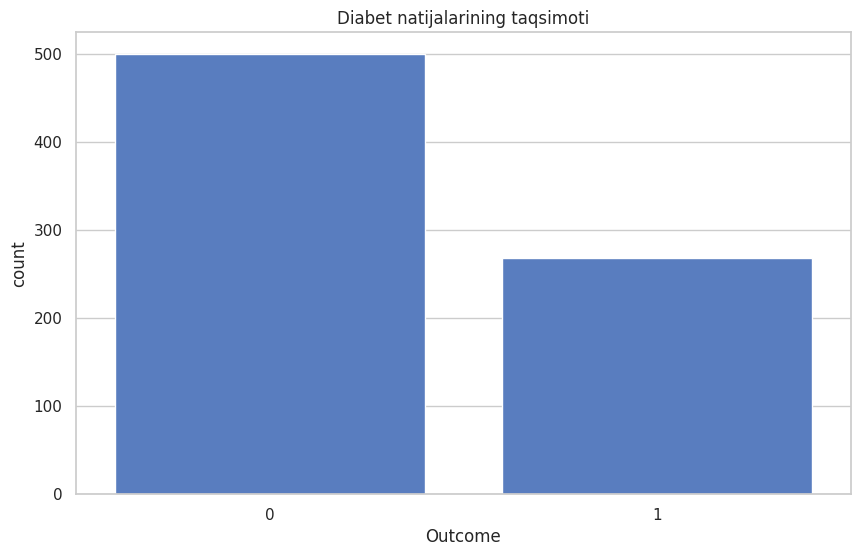

In [306]:
sns.countplot(x='Outcome', data=data)
plt.title('Diabet natijalarining taqsimoti')
plt.show()

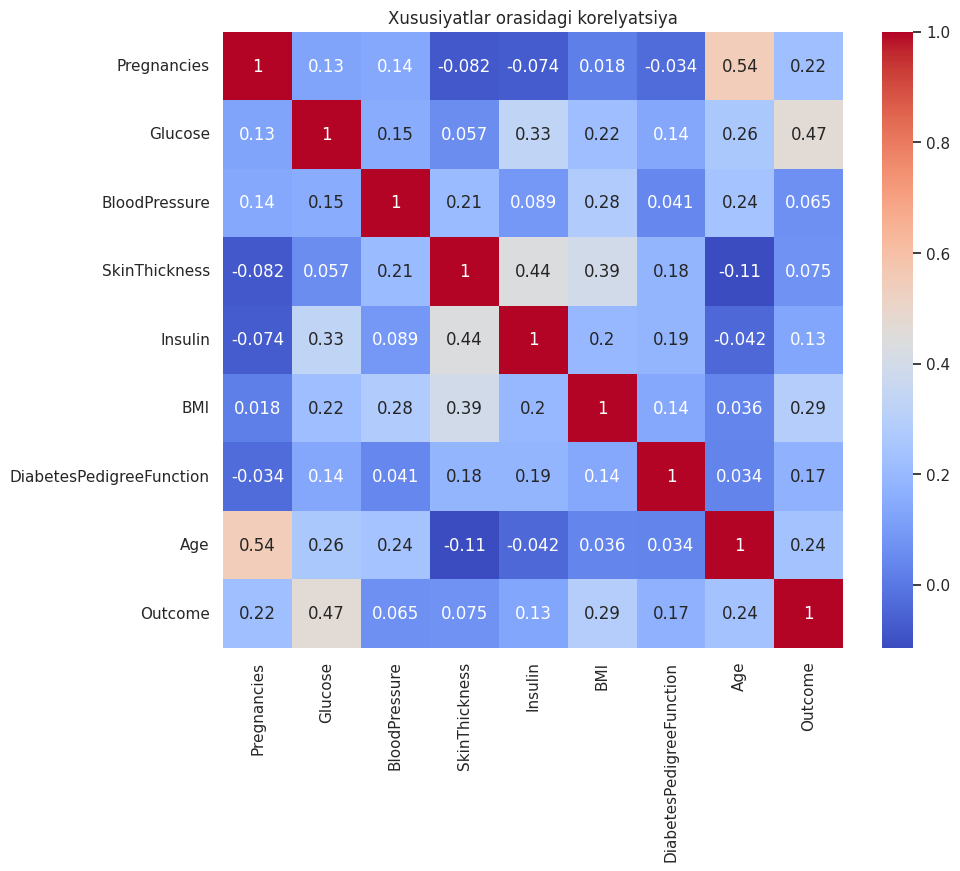

In [305]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Xususiyatlar orasidagi korelyatsiya')
plt.show()


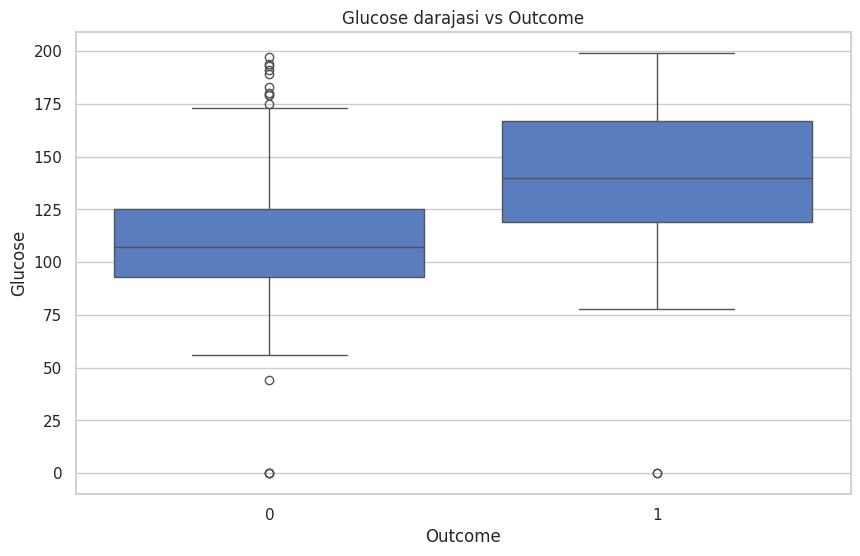

In [304]:
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.title('Glucose darajasi vs Outcome')
plt.show()

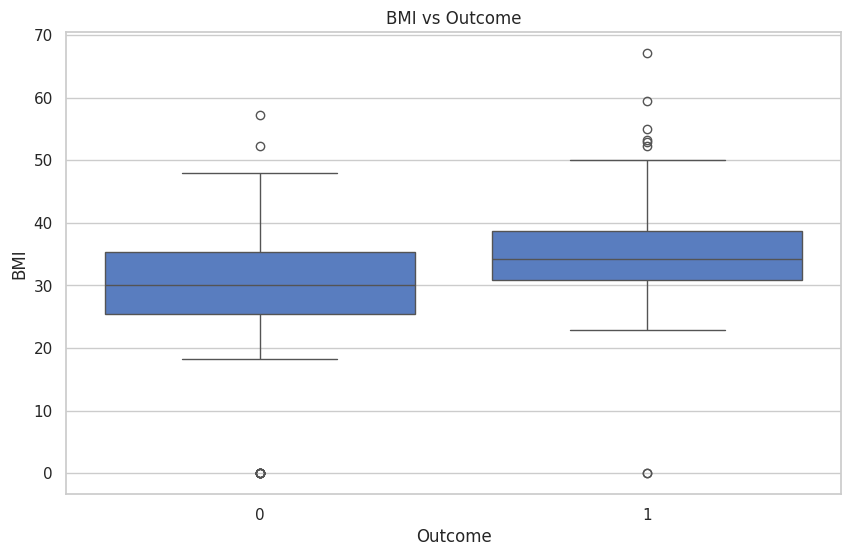

In [302]:
sns.boxplot(x='Outcome', y='BMI', data=data)
plt.title('BMI vs Outcome')
plt.show()


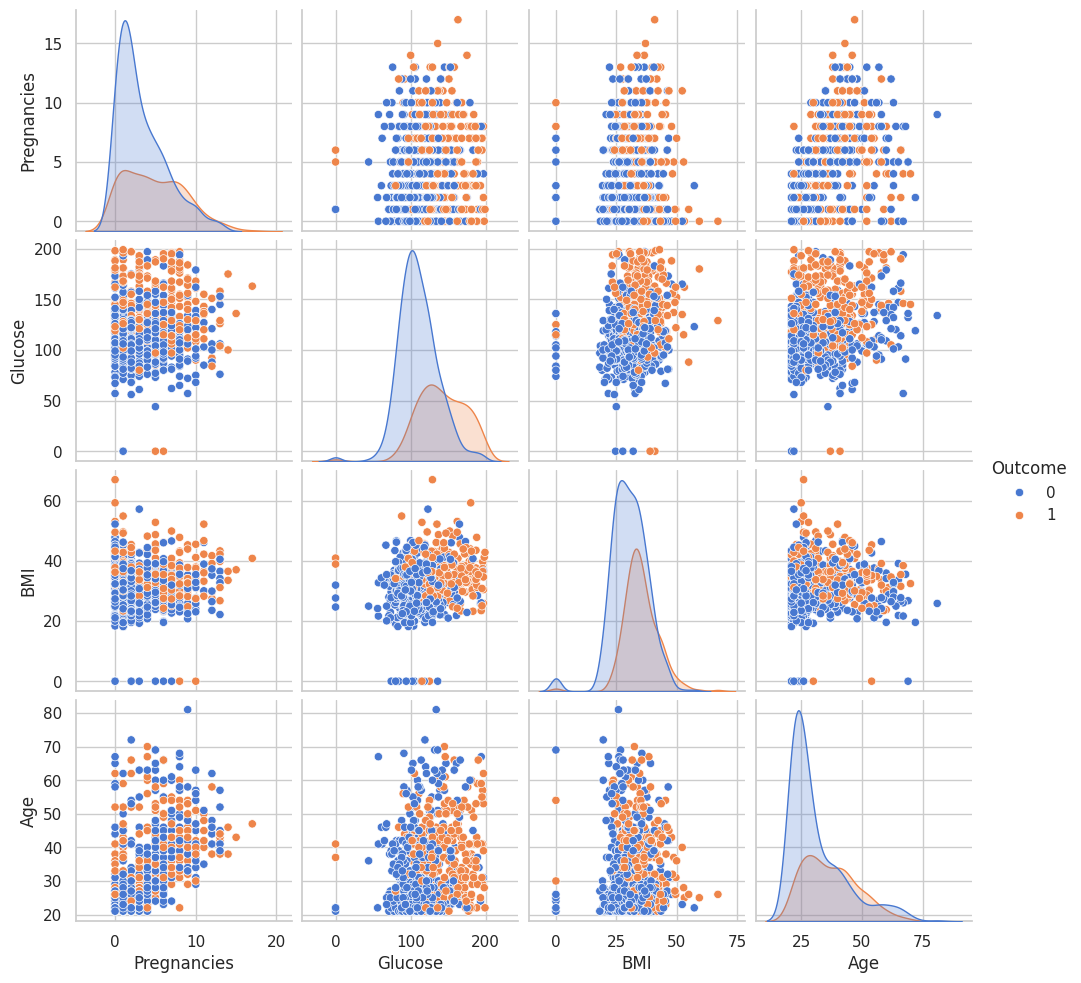

In [303]:
sns.pairplot(data[['Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome']], hue='Outcome')
plt.show()

In [278]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [279]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [280]:
X = scaler.fit_transform(X)

In [281]:
X > 1

array([[False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False]])

In [282]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [283]:
from sklearn.neighbors import KNeighborsClassifier

In [284]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [285]:
y_pred = knn.predict(x_test)

In [286]:
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [287]:
from sklearn.metrics import jaccard_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [288]:
jaccard_score(y_test,y_pred)

np.float64(0.42105263157894735)

<Axes: >

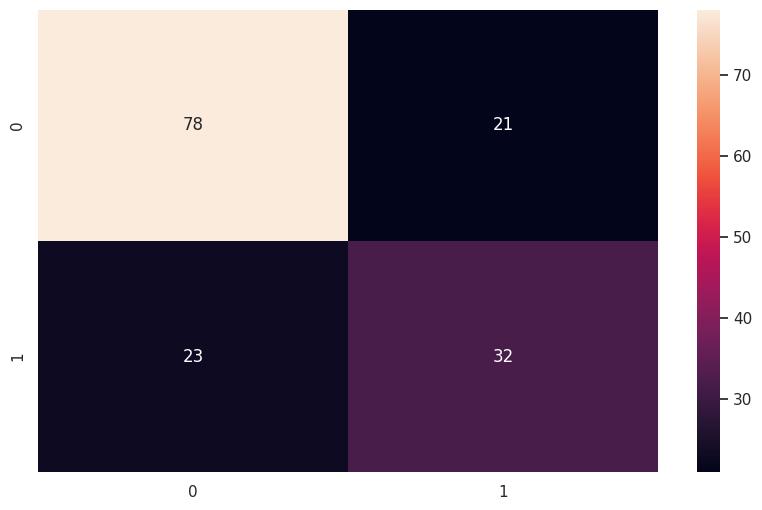

In [289]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [290]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.77      0.79      0.78        99\n           1       0.60      0.58      0.59        55\n\n    accuracy                           0.71       154\n   macro avg       0.69      0.68      0.69       154\nweighted avg       0.71      0.71      0.71       154\n'

# Eng yaxshi k ni topish

In [291]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors":np.arange(1,25)}

knn_gscv =GridSearchCV(knn,param_grid,cv=5)

knn_gscv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=11),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [292]:
knn_gscv.cv_results_['rank_test_score']

array([24, 23, 15, 18, 22, 21, 17, 16, 20, 19, 14,  9,  4, 11,  3, 12,  1,
        6,  2,  8,  5, 10,  7, 13], dtype=int32)

In [293]:
knn_gscv.best_params_

{'n_neighbors': np.int64(17)}

In [294]:
knn_gscv.best_score_

np.float64(0.7669892199303965)

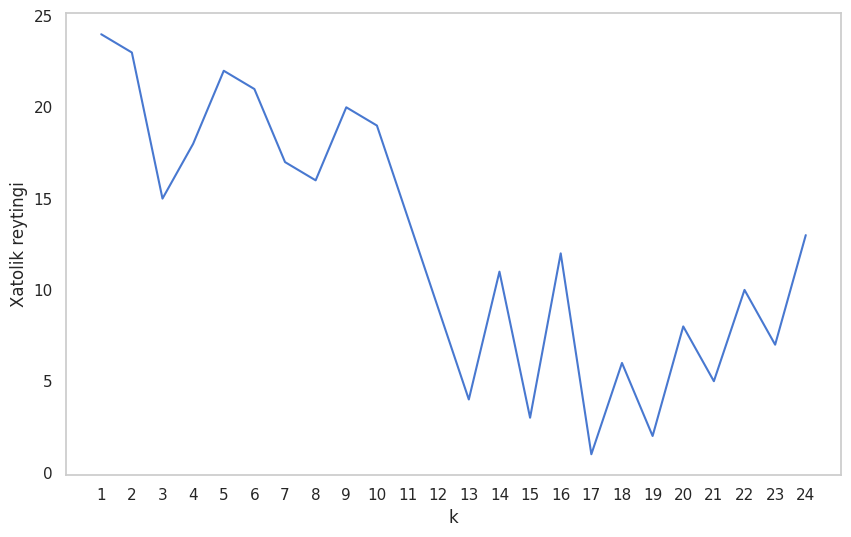

In [296]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

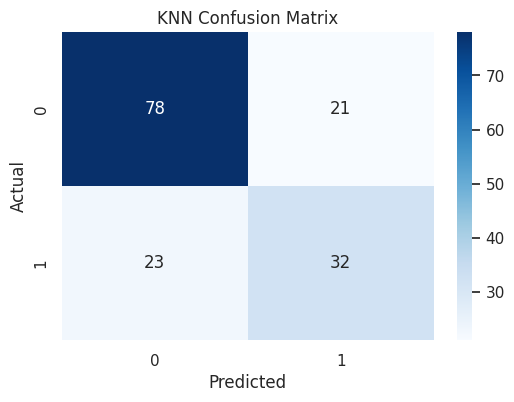

In [307]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()


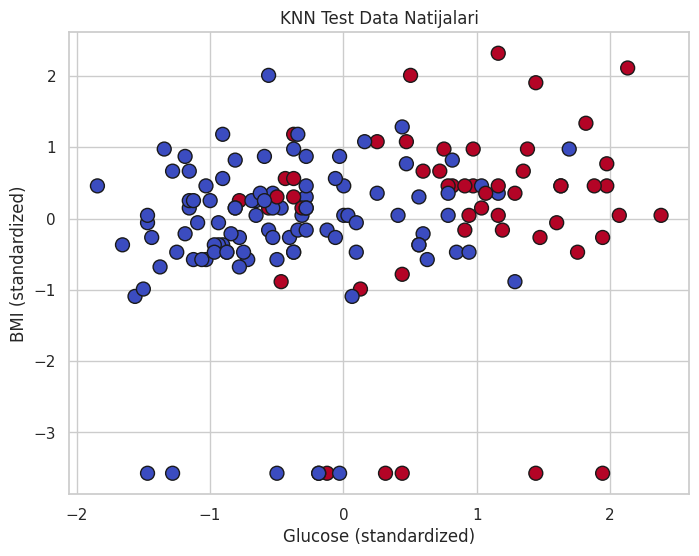

In [308]:
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,1], X_test[:,2], c=y_pred, cmap='coolwarm', edgecolor='k', s=100)
plt.xlabel("Glucose (standardized)")
plt.ylabel("BMI (standardized)")
plt.title("KNN Test Data Natijalari")
plt.show()